In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [26]:
adultos_ago = pd.read_csv('../data/RSH/agosto_2023/ADULTOS MAYORES POR CSE.csv')
adultos_julio = pd.read_csv('../data/RSH/julio_2022/ADULTOS MAYORES.csv')
adultos_sep = pd.read_csv('../data/RSH/septiembre_2024/ADULTOS MAYORES POR CSE.csv')

In [21]:
adultos_ago.head()

total_adultos_ago = adultos_ago['Total'].sum()

total_adultos_ago

2506440.0

In [24]:
adultos_julio.head()

total_adultos_julio = adultos_julio['Total de adultos mayores con RSH'].sum()
total_adultos_julio

2388118.0

In [27]:
total_adultos_sep = adultos_sep['Total'].sum()

data_adultos = pd.DataFrame({
    'año' : ['2022', '2023', '2024'],
    'total' : [total_adultos_julio, total_adultos_ago, total_adultos_sep]
})

data_adultos

,año,total
0,2022,2388118.0
1,2023,2506440.0
2,2024,2606486.0


In [55]:
data_adultos['total'] = data_adultos['total'].astype(int)

In [50]:
info_adultos = pd.read_csv('../data/DTP_CSV/tabla-usuarios_por_tipo-temp.csv')

transporte_a = info_adultos.iloc[[10,11,12,13],[0,4]]

In [59]:
transporte_a['Adulto Mayor'] = transporte_a['Adulto Mayor'].astype(int)
transporte_a['Año'] = transporte_a['Año'].astype(int)

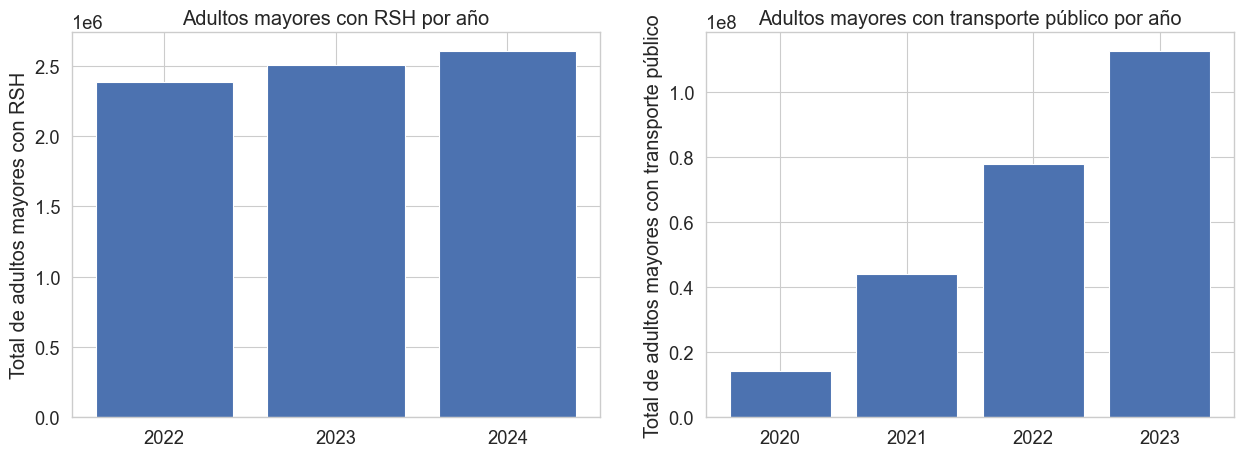

In [62]:
fig, ax = plt.subplots(1,2 , figsize=(15,5))

ax[0].bar(data_adultos['año'], data_adultos['total'])
ax[0].set_title('Adultos mayores con RSH por año')
ax[0].set_ylabel('Total de adultos mayores con RSH')

ax[1].bar(transporte_a['Año'], transporte_a['Adulto Mayor'])
ax[1].set_title('Adultos mayores con transporte público por año')
ax[1].set_ylabel('Total de adultos mayores con transporte público')
ax[1].set_xticks([2020,2021,2022, 2023])

plt.show()

In [81]:
transport_a = info_adultos.iloc[:, [0,4]]
transport_a['A2'] = transport_a['Adulto Mayor'].apply(lambda x: x**2)

/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_50442/2303562620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_a['A2'] = transport_a['Adulto Mayor'].apply(lambda x: x**2)


In [ ]:
LR = LinearRegression()


X = transport_a['Año'].values.reshape(-1,1)
y = transport_a['Adulto Mayor'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR.fit(X_train, y_train)

r2 = LR.score(X_test, y_test)
r2

0.1879577301902785

In [75]:
coeficiente = LR.coef_

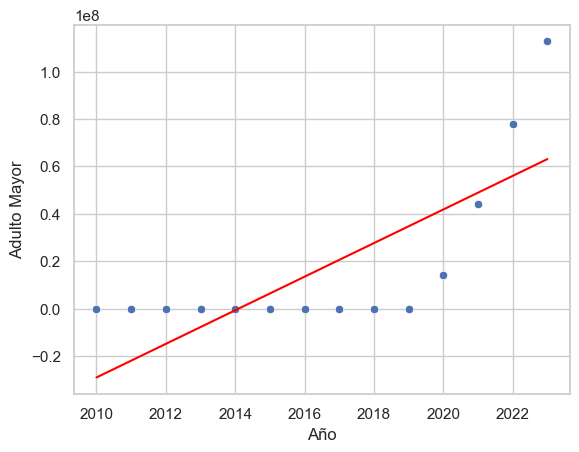

In [76]:
sns.set_theme(style='whitegrid')
linear = coeficiente*X + LR.intercept_
sns.scatterplot(x='Año', y='Adulto Mayor', data=transport_a)
plt.plot(X, linear, color='red')
plt.show()

In [78]:
#predicción para el 2024

prediccion = LR.predict([[2024]])
prediccion

array([70162841.6478405])

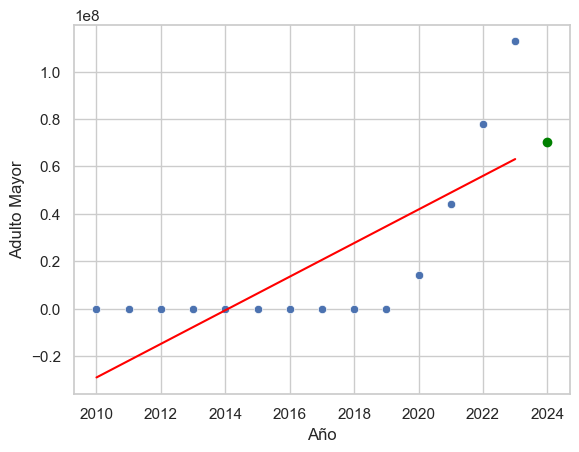

In [79]:
sns.set_theme(style='whitegrid')
sns.scatterplot(x='Año', y='Adulto Mayor', data=transport_a)
plt.plot(X, linear, color='red')
plt.scatter(2024, prediccion, color='green')
plt.show()

In [83]:
#cuadratic regression

LR2 = LinearRegression()

X2 = transport_a['Año'].values.reshape(-1,1)
y2 = transport_a['A2'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

LR2.fit(X2_train, y2_train)

r2_2 = LR2.score(X2_test, y2_test)


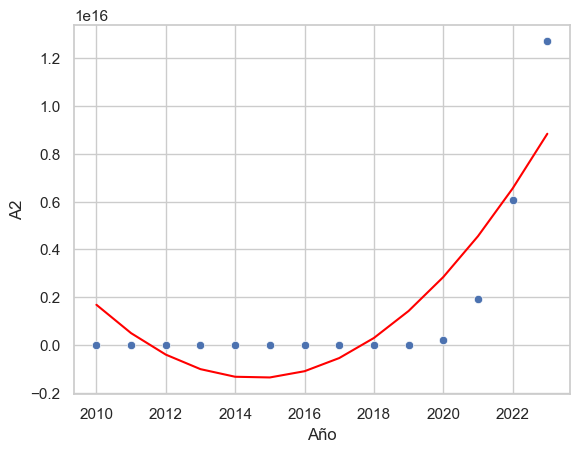

In [84]:
fit = np.polyfit(transport_a['Año'], transport_a['A2'], 2)
fit_fn = np.poly1d(fit)

sns.set_theme(style='whitegrid')
sns.scatterplot(x='Año', y='A2', data=transport_a)
plt.plot(transport_a['Año'], fit_fn(transport_a['Año']), color='red')
plt.show()

In [85]:
LR2.predict([[2024]])


array([6.31607554e+15])

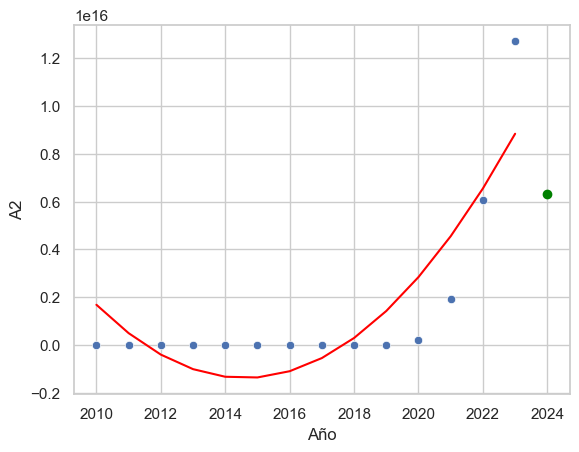

In [86]:
sns.set_theme(style='whitegrid')
sns.scatterplot(x='Año', y='A2', data=transport_a)
plt.plot(transport_a['Año'], fit_fn(transport_a['Año']), color='red')
plt.scatter(2024, LR2.predict([[2024]]), color='green')
plt.show()